# Project Business Statistics: E-news Express

## Business Context 

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?


2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for thenew page greater than the conversion rate for the old page?


3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]


4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website


2. group - Whether the user belongs to the first group (control) or the second group (treatment)


3. landing_page - Whether the landing page is new or old


4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page


5. converted - Whether the user gets converted to a subscriber of the news portal or not


6. language_preferred - Language chosen by the user to view the landing page

## Import the Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import stats

## Loading the Dataset 

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview 

In [3]:
#Viewing the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#Viewing the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#Amount of rows and columns in the datatset
df.shape

(100, 6)

In [6]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
#Statistical summary for numerical variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [8]:
#Statistical summary for categorical variables 
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


## Check for Missing Values 

In [9]:
#Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

## Checking for Duplicates 

In [10]:
#Checking for duplicates 
df.duplicated().sum()

0

## Univariate Analysis 

### Time Spent on a Page 

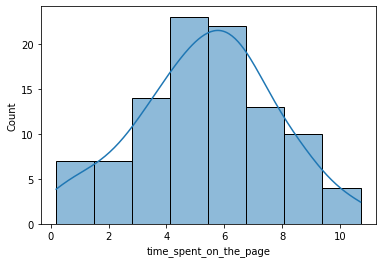

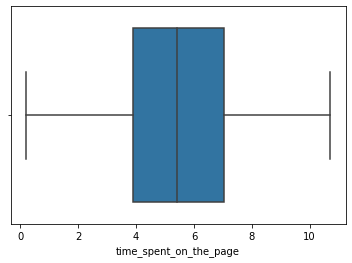

In [11]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Observations:
* The distribution is approximately normal, in which the median time spent on the page is 5 minutes

### Group

In [12]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

<AxesSubplot:xlabel='group', ylabel='count'>

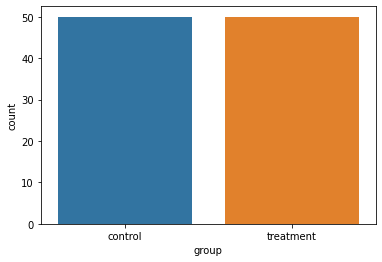

In [13]:
sns.countplot(data=df,x='group')

### Landing Page 

In [14]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

<AxesSubplot:xlabel='landing_page', ylabel='count'>

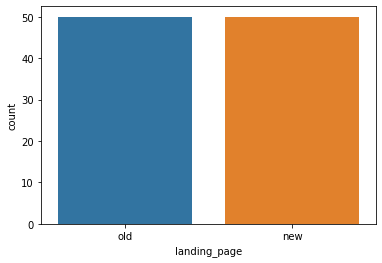

In [15]:
sns.countplot(data=df,x='landing_page')

### Converted 

In [16]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

<AxesSubplot:xlabel='converted', ylabel='count'>

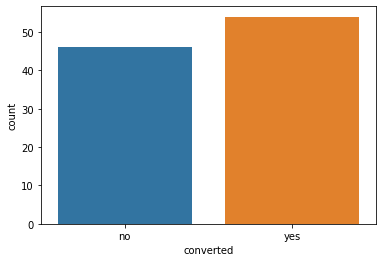

In [17]:
sns.countplot(data=df,x='converted')

#### Observations:
   * More users gave converted to suscriber after viewing E-News landpage

### Language Preferred 

In [18]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

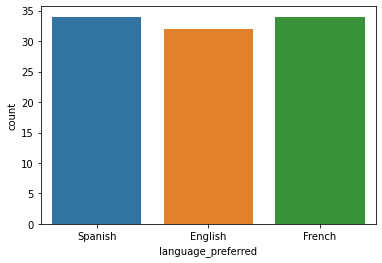

In [19]:
sns.countplot(data=df,x='language_preferred')

#### Observations:
* More people prefer Spanish and French than English as the preferred language

## Bivariate Analysis 

### Landing Page vs Time Spent 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

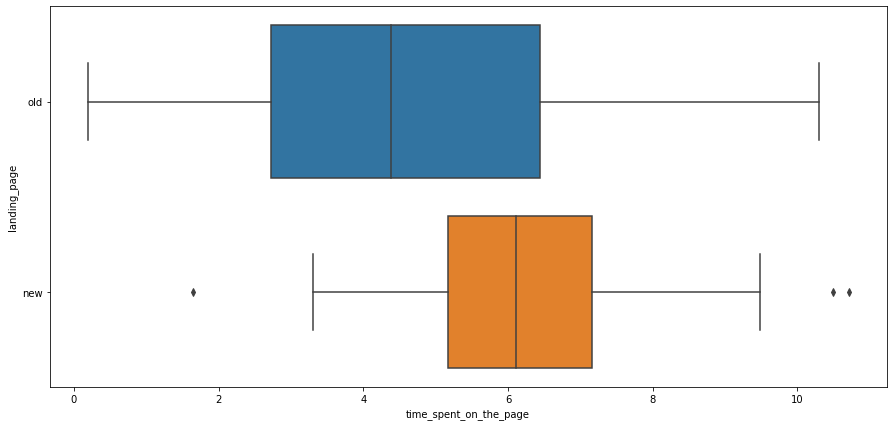

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page')

* We can see that based on the boxplot depiction, the median time spent on the new landing page vs the old landing page is higher and this will likely create an attraction to the new landing page 

### Time Spent vs Conversion 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='converted'>

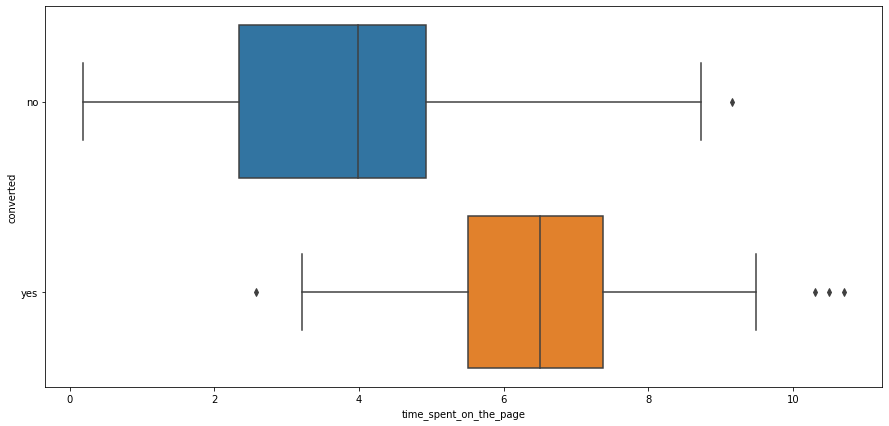

In [21]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='time_spent_on_the_page',y='converted')

* Based on this, we see that people that converted to suscriber had a higher median time spent on the page than the person who did not suscribe, and there are some more outliers near the higher whisker which may indicate that there are people that go over the 10 minute mark when becoming a suscriber

### Language Preferred vs Time Spent

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='language_preferred'>

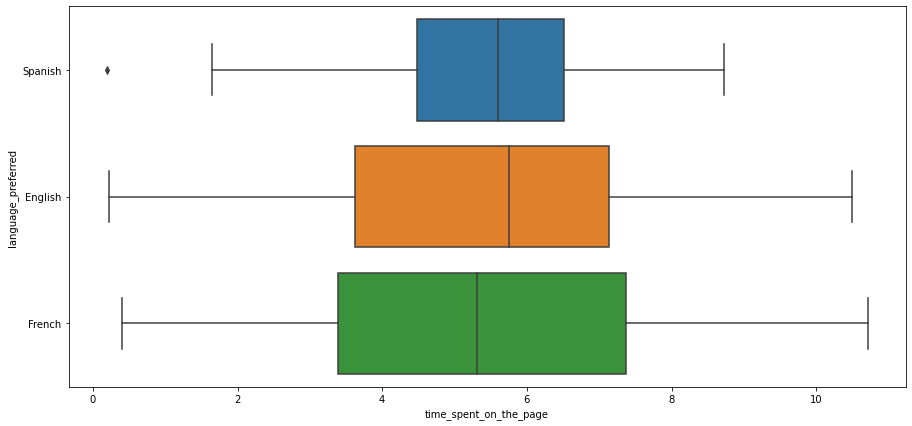

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='time_spent_on_the_page',y='language_preferred')

* The users who speak English have the highest median price 

## Do the users spend more time on the new landing page than on the existing landing page? 

### Perform Visual Analysis

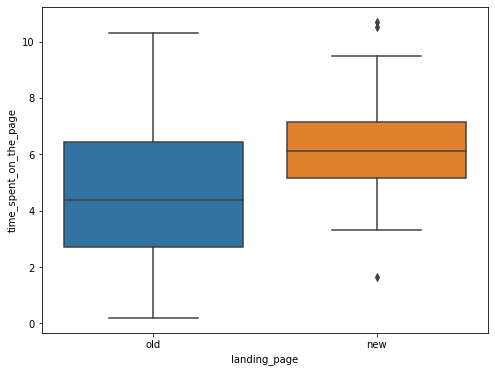

In [23]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

#### Observations:
* We see that the median time spent on the new page has a higher median time spent on the page than on the old one. It also has a couple of outliers, depicting that there are rare cases where users spent 10 minutes or more on the new landpage

### Step 1: Define the Null and Alternate Hypothesis

H0: Does the average time spent on the new page less than or equal to the the old page?

Ha: Does the average time spent on the new page greater than the average time spent on the old page?

### Step 2: Selecting the Appropriate Test 

In [24]:
from scipy.stats import ttest_ind

* We will use a t-test for this hypothesis test in order to test for the two individual population means and the two unknown standard deviations. 

### Step 3: Deciding the Significance Level

* We will use a 5% significance level

### Step 4: Collect and Prepare Data 

In [25]:
new_time_spent = df[df['landing_page']=='new']['time_spent_on_the_page']
old_time_spent = df[df['landing_page']=='old']['time_spent_on_the_page']

In [26]:
print('the population standard deviation is of the time spent on the new page is',round(new_time_spent.std(),2))
print('the population standard deviation is of the time spent on the old page is',round(old_time_spent.std(),2))

the population standard deviation is of the time spent on the new page is 1.82
the population standard deviation is of the time spent on the old page is 2.58


* We can say based on this evidence, that this will be a t-test for unequal standard deviation

### Step 5: Finding the P-Value 

In [27]:
t_stat,p_value = ttest_ind(new_time_spent,old_time_spent,equal_var=False,alternative='greater')
print('P-Value:',p_value)

P-Value: 0.0001392381225166549


### Step 6: Comparing the P-Value to the Alpha Level 

In [28]:
if p_value < 0.05:
    print('We reject the null hypothesis since the p-value is less than the alpha level')
else:
    print('We fail to reject the null hypothesis since the p-value is greater than the alpha level')

We reject the null hypothesis since the p-value is less than the alpha level


### Step 7: Draw Inference 

* My inference is that based in the findings, there is statistically significant evidence that the time spent on the new landing page is more than the time spent on the old landing page

##  Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis 

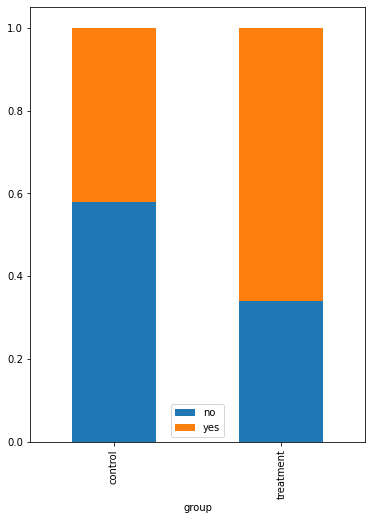

In [29]:
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind='bar',figsize=(6,8),stacked=True)
plt.legend()
plt.show()

* Most users in the control group did not become a suscriber to the existing page, while most users in the treatment group became users for the new landpage

### Step 1: Define the Null and Alternative Hypothesis 

H0: Is the conversion rate for the new page less than or equal to the conversion rate for the old page?

Ha: Is the converstion rate for the new page greater than the conversion rate for the old page?

### Step 2: Select the Appropriate Test

In [30]:
from statsmodels.stats.proportion import proportions_ztest

* This will most likely be a 2 sample proportion z-test, let's check if the assumptions are satisfied

### Step 3: Decide the Significance Level

* We will use a 5% significance level

### Step 4: Collecting and Preparing the Data

In [31]:
new_converted = df[df['group']=='treatment']['converted'].value_counts()['yes']
old_converted = df[df['group']=='control']['converted'].value_counts()['yes']
n_treatment = df.group.value_counts()['treatment']
n_control = df.group.value_counts()['control']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the P-Value

In [32]:
t_stat,p_value=proportions_ztest([new_converted,old_converted],[n_treatment,n_control],alternative='larger')
print('P-Value:',p_value)

P-Value: 0.008026308204056278


### Step 6: Comparing the P-Value to the Alpha Level

In [33]:
if p_value<0.05:
    print('We reject the null hypothesis since the p-value is less than the alpha level')
else:
    print('We fail to reject the null hypothesis since the p-value is greater than the alpha level')

We reject the null hypothesis since the p-value is less than the alpha level


### Step 7: Draw Inference 

* Since the p-value is less than the alpha level, we can say that we reject the null hypothesis and safely say that the proportion for the conversion rate is greater for the new landing page than the old one

## Does the converted status depend on the preferred language? 

### Perform Visual Analysis 

<AxesSubplot:xlabel='converted'>

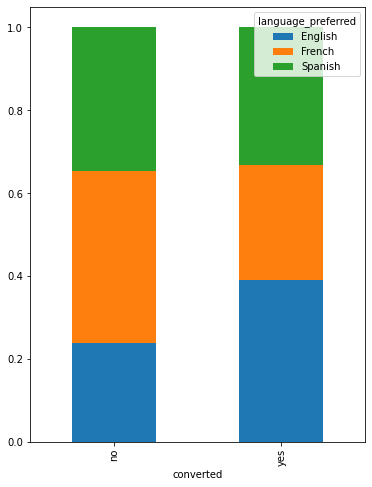

In [34]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind='bar',figsize=(6,8),stacked=True)

* Most people who prefer the english language were most likely to convert to suscriber, while most users who prefer the french language did not convert to suscriber

###  Step 1: Define the Null and Alternate Hypothesis

H0: Is language preference independent from conversion status?
    
Ha: Is language preference dependent upon conversion status

### Step 2: Selecting the Appropriate Test 

In [35]:
from scipy.stats import chi2_contingency

* Since these are two categorical variables that are being tested based on independence, we will us the chi-square test of independence

### Step 3: Selecting the Significance Level 

* We will use a 5% significance level

### Step 4: Collect and Prepare Data 

In [36]:
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Finding the P-Value 

In [37]:
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is:',p_value)

The p-value is: 0.21298887487543447


### Step 6: Compare the P-Value with the Alpha Level

In [38]:
if p_value < 0.05:
    print('As the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Making Inference  

* Since we know that the p-value is above the alpha level, we fail to reject the null hypothesis, saying that conversion status is does not depend on language preference

## Is the time spent on the new page same for the different language users? 

### Perform Visual Analysis

In [39]:
#Creating a new data frame for people who got served the new landpage
df_new = df[df['landing_page']=='new']

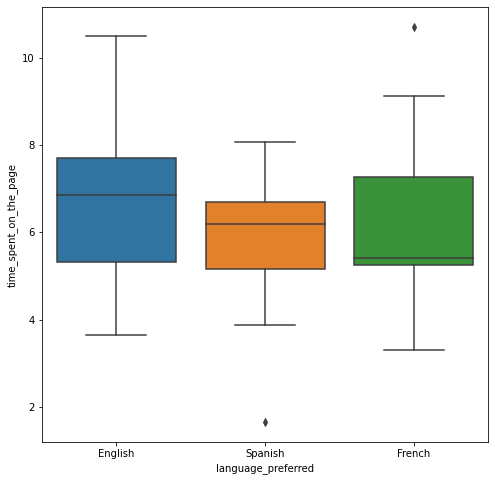

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_new,x='language_preferred',y='time_spent_on_the_page')
plt.show()

In [41]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

* To ensure normality, we will conduct a shapiro's test, since there seems to be a skew in some of the languages when it comes to the time spent on the new page 

#### Shapiro-Wilks Test 

H0: Language Preferences follow a Normal Distribution

Ha: Language Preferences do not follow a normal distribution

In [42]:
from scipy import stats
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('p-value:',p_value)

p-value: 0.8040016293525696


#### Levene's Test 

H0: All population variations are equal
    
Ha: All population variances are NOT equal

In [43]:
from scipy.stats import levene
stat, p_value = levene(df_new['time_spent_on_the_page'][df_new['language_preferred']=='English'],
                      df_new['time_spent_on_the_page'][df_new['language_preferred']=='Spanish'],
                      df_new['time_spent_on_the_page'][df_new['language_preferred']=='French'])
print('p-value:',p_value)

p-value: 0.46711357711340173


* So we can see that both of the main assumptions for the test for a one-way ANOVA test are satisfied

### Step 1: Define the null and alternate hypotheses 

H0: The three languages time spent are NOT different from each other 

Ha: The three languages time spent are different from one another

### Step 2:  Select Appropriate Test

In [44]:
from scipy.stats import f_oneway

* We will use a one-way ANOVA test for this since all assumptions are satisified

### Step 3: Decide the Alpha Level

* We will use a 5% alpha level

### Step 4: Preparing the Data

In [45]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'] 

### Step 5: Calculating the P-Value

In [46]:
t_stat,p_value=f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)
print('p-value:',p_value)

p-value: 0.43204138694325955


### Step 6: Comparing it to the Alpha Level 

In [47]:
if p_value < 0.05:
    print('As the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('As the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Make an Inference 

* Since the p-value is greater than the alpha level, we fail to reject the null hypothesis due to this. We do not have enough statistical evidence that the three languages are NOT different from each other

## Conclusions and Business Recommendations

* The business should focus on the new landing page, as there is a higher conversion status among this page than the old landing page. Users also spend more time on the new landing page

* Since conversion status does not seem to be dependent upon language preference, in which we can stick to the English language, since that is a wide known language among users. despite the count being spanish and french users as more than english users

* Since user's language preference does differ their time spent by a whole lot, we can assume that it does not affect the attractiveness of the new landpage